In [203]:
import numpy as np

In [217]:
class LassoReg():
    def __init__(self,intercept=True,lam = 10**np.linspace(-5, 1, num=100, endpoint=True),tol=10*-3, max_epoch = 1000):
        self.intercept = intercept
        self.lam = lam
        self.tol = tol
        self.max_epoch = max_epoch

        
    def initialization(self,X):
        # initialize coefs
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.beta = np.zeros((self.p,1))

    def calculate_rho(self,X,y, j):
        beta_k = np.delete(self.beta, j)
        X_k = np.delete(X, j, 1)
        y_hat_k = X_k@beta_k
       # print(y.shape,y_hat_k.shape)
        residual = y - y_hat_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j
    
    def calculate_z(self, X):
        self.z = np.sum(X*X,0)
              
    def design_matrix(self,X,y):
        if self.intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack([ones, X])
        y = np.array(y).reshape(-1)
        return X, y
    
    def coordinate_descent(self,X, y,l):
        for j in range(len(self.beta)): 
            rho_j = self.calculate_rho(X,y,j)
            if j == 0: #Intercept is not included with the alpha regularisation
                self.beta[j] = rho_j/self.z[j]
            else:
                self.beta[j] = np.max([(rho_j-self.n*l)/self.z[j],0])-np.max([(-rho_j-self.n*l)/self.z[j],0])

    
    def fit(self, X, y, progressBar=True):
        X, y = self.design_matrix(X,y)
        self.calculate_z(X)
        self.beta_rec = np.zeros((len(self.lam),X.shape[1]))
        self.mse_rec = np.zeros((len(self.lam),1))
        for i, l in enumerate(self.lam):
            self.initialization(X)
            max_change = 1000.
            iteration = 0
            while(max_change>self.tol):
                old_beta = np.copy(self.beta)
                self.coordinate_descent(X, y, l)
                max_change = abs(old_beta-self.beta).max()
                iteration += 1
                if iteration > self.max_epoch:
                    break
            # caculate metrics
            y_hat = (X@self.beta).ravel()
            mse = np.mean(np.power((y_hat-y),2))
            print("mse:",mse)
            self.beta_rec[i,:] = self.beta.reshape(len(self.beta))
            self.mse_rec[i] = mse
            # to track the process
            if progressBar:
                complete = (i + 1) / len(self.lam)
                not_complete = 1 - complete
                complete = int(50 * complete)
                not_complete = int(50 * not_complete)
                print('[' + ">" * complete, end='')
                print('-' * not_complete + ']' + '[%' + str((i + 1) * 100 / len(self.lam)) + ']')

In [209]:
# Generate Training data
from scipy.stats import multivariate_normal
def X_data_generation(r, samples, features):
    a = np.zeros((features, features))
    b = a.copy()
    
    for i in range(features):
        a[i, :] = i + 1
    
    for j in range(features):
        b[:, j] = j + 1
    
    dc = r**np.abs(a - b)
    mean_vector = np.zeros(dc.shape[0])
    X = multivariate_normal.rvs(mean=mean_vector, cov=dc, size=samples)
    
    return X

def beta_initiate(features):
    s = np.concatenate((np.linspace(1, 2.9, features), np.linspace(-2.9, -1, features)))
    theta = np.matrix(np.random.choice(s, size=features)).T
    theta[4, 0] = 1.1
    
    return theta

def Y_data_generation(X, beta):
    ebr = np.random.normal(0, 1, size=(X.shape[0],1))
    Y = X@beta + ebr
    return Y

In [235]:
# generate training data
r = 0.5
samples = 10
features = 20

X = X_data_generation(r, samples, features)
init_beta = beta_initiate(features)
y = Y_data_generation(X, init_beta)
#y = np.array(y).reshape(len(y))

In [237]:
Ls = LassoReg(intercept=False,lam = 10**np.linspace(-4, 3, num=200, endpoint=True),tol=10*-3, max_epoch = 10000)
Ls.fit(X,y)

mse: 9.441338473383672e-08
[-------------------------------------------------][%0.5]
mse: 1.1101593633552882e-07
[-------------------------------------------------][%1.0]
mse: 1.305380392331882e-07
[-------------------------------------------------][%1.5]
mse: 1.5349309521924758e-07
[>-------------------------------------------------][%2.0]
mse: 1.804847875634939e-07
[>------------------------------------------------][%2.5]
mse: 1.788013140171162e-07
[>------------------------------------------------][%3.0]
mse: 3.182911268391784e-07
[>------------------------------------------------][%3.5]
mse: 5.490110614695936e-07
[>>------------------------------------------------][%4.0]
mse: 5.998113065613796e-07
[>>-----------------------------------------------][%4.5]
mse: 7.0528785733569e-07
[>>-----------------------------------------------][%5.0]
mse: 8.293124125243692e-07
[>>-----------------------------------------------][%5.5]
mse: 1.2157177674930052e-06
[>>>-------------------------------

mse: 0.5163687996061311
[>>>>>>>>>>>>>>>>>>>>>>>>-------------------------][%48.5]
mse: 0.5748860132762346
[>>>>>>>>>>>>>>>>>>>>>>>>-------------------------][%49.0]
mse: 0.6436934528746029
[>>>>>>>>>>>>>>>>>>>>>>>>-------------------------][%49.5]
mse: 0.724600650041814
[>>>>>>>>>>>>>>>>>>>>>>>>>-------------------------][%50.0]
mse: 0.8197353417504913
[>>>>>>>>>>>>>>>>>>>>>>>>>------------------------][%50.5]
mse: 0.9315994265710257
[>>>>>>>>>>>>>>>>>>>>>>>>>------------------------][%51.0]
mse: 1.063134760821703
[>>>>>>>>>>>>>>>>>>>>>>>>>------------------------][%51.5]
mse: 1.2178005249424684
[>>>>>>>>>>>>>>>>>>>>>>>>>>------------------------][%52.0]
mse: 1.3996641947110038
[>>>>>>>>>>>>>>>>>>>>>>>>>>-----------------------][%52.5]
mse: 1.6135085097066244
[>>>>>>>>>>>>>>>>>>>>>>>>>>-----------------------][%53.0]
mse: 1.8658024857871776
[>>>>>>>>>>>>>>>>>>>>>>>>>>-----------------------][%53.5]
mse: 2.1939030208622556
[>>>>>>>>>>>>>>>>>>>>>>>>>>>-----------------------][%54.0]
mse

mse: 98.65177012826693
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>][%98.5]
mse: 98.65177012826693
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>][%99.0]
mse: 98.65177012826693
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>][%99.5]
mse: 98.65177012826693
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>][%100.0]


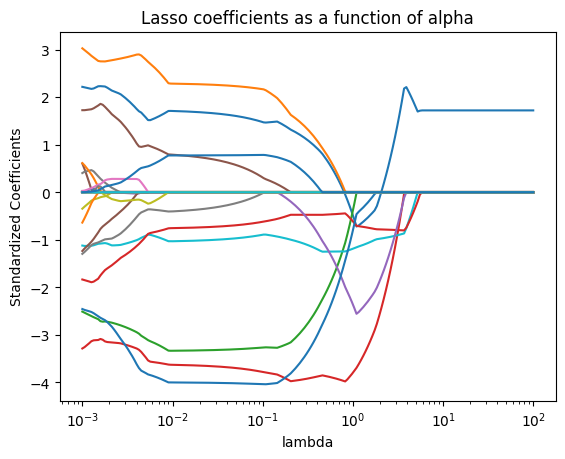

In [229]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(Ls.lam, Ls.beta_rec)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [220]:
# find the optimal coefficients
optIndex = np.argmin(Ls.mse_rec)
opt_beta = Ls.beta_rec[optIndex,:]
print("the best coeffcients:\n", opt_beta)
print("the optimal lambda:\n", Ls.lam[optIndex])

the best coeffcients:
 [-2.28177665 -2.51783027  1.31932561 -0.64303533  2.67489028  0.34781301
  6.22243316  0.3037193  -0.18034125  0.36793392  1.09446434  0.84732825
  1.76743898  0.26257139 -0.60560817 -1.92619323  4.62441733  0.55146187
 -1.55428777 -0.21107963  1.31275801  3.16643553  0.03940144  1.37500381
 -2.97277373 -0.00766157 -0.20423454  0.68065335 -0.38610604  1.90212302
  0.47564805  0.15276261  0.40973237 -0.27179456 -0.55112442  0.63701342
  2.21000816 -2.76228162  1.05994991 -0.6406934  -1.12523485]
the optimal lambda:
 0.0001


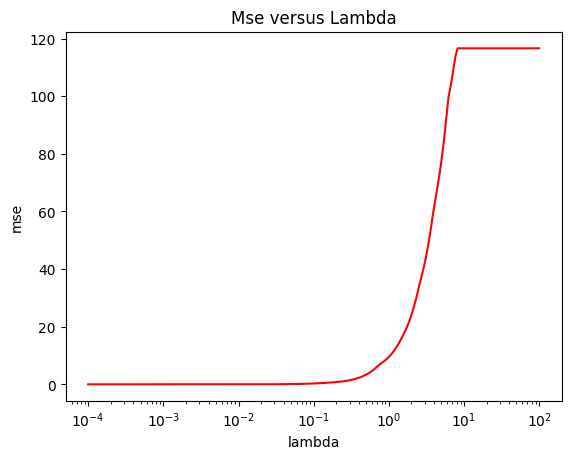

In [221]:
ax = plt.gca()
ax.set_xscale('log')
plt.plot(Ls.lam,Ls.mse_rec,c="red")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.title('Mse versus Lambda')
plt.show()